# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

# Описание данных

**airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)  
**balcony** — число балконов  
**ceiling_height** — высота потолков (м)  
**cityCenters_nearest** — расстояние до центра города (м)  
**days_exposition** — сколько дней было размещено объявление (от публикации до снятия)  
**first_day_exposition** — дата публикации  
**floor** — этаж  
**floors_total** — всего этажей в доме  
**is_apartment** — апартаменты (булев тип)  
**kitchen_area** — площадь кухни в квадратных метрах (м²)  
**last_price** — цена на момент снятия с публикации  
**living_area** — жилая площадь в квадратных метрах (м²)  
**locality_name** — название населённого пункта  
**open_plan** — свободная планировка (булев тип)  
**parks_around3000** — число парков в радиусе 3 км  
**parks_nearest** — расстояние до ближайшего парка (м)  
**ponds_around3000** — число водоёмов в радиусе 3 км  
**ponds_nearest** — расстояние до ближайшего водоёма (м)   
**rooms** — число комнат  
**studio** — квартира-студия (булев тип)   
**total_area**— общая площадь квартиры в квадратных метрах (м²)  
**total_images** — число фотографий квартиры в объявлении

# Шаг 1

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_neare

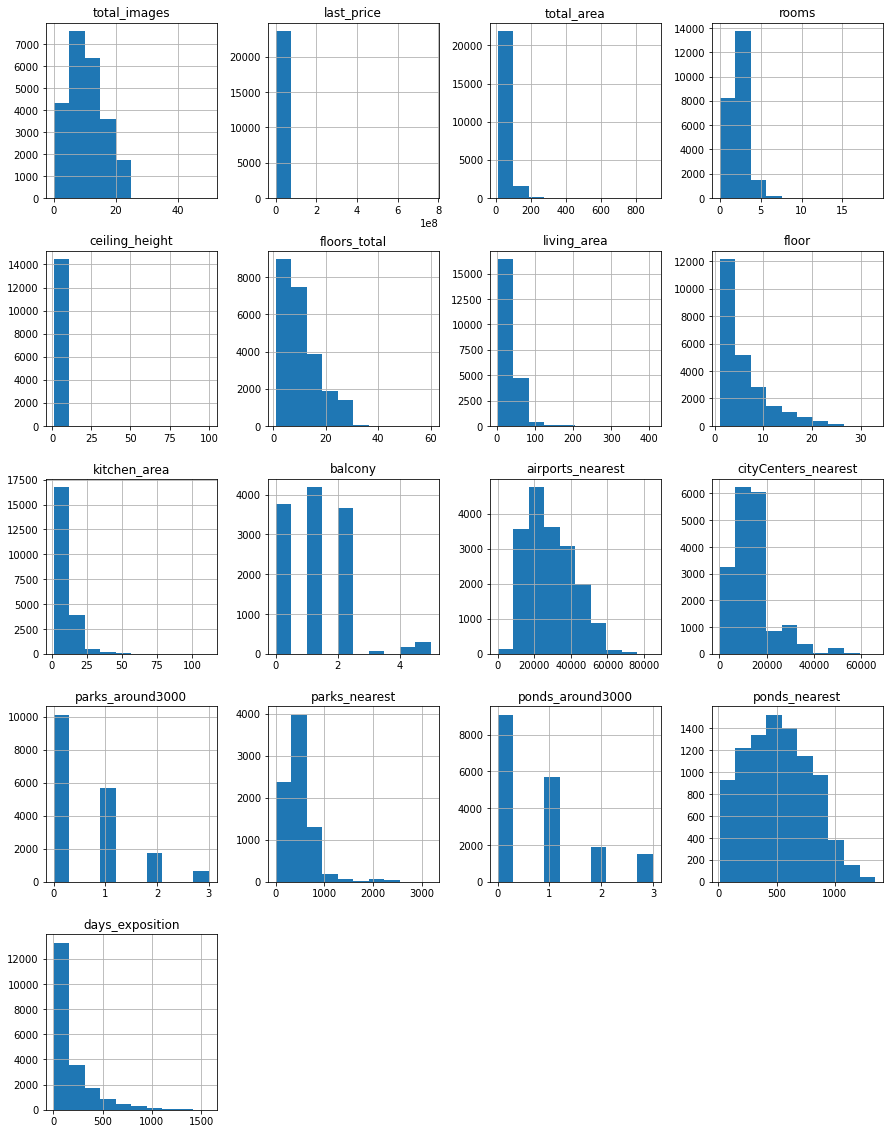

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/Users/user/Desktop/Курсы/Яндекс/3 спринт/real_estate_data.csv', sep='\t')

print(display(data.head()))
print(data.info())
print(data.describe())
print(f'Количество выявленных дубликатов: {data.duplicated().sum()}')

data.hist(figsize=(15, 20))
plt.show()

Видно, что в некоторых стоблцах присутствует больше количество пропусков, дубликаты отстутствуют. Так же наблюдаются сомнительные данные, например 60-этажный дом или 19-комнатная квартира. Разберемся в следующем шаге.

# Шаг 2

### Выполните предобработку данных

#### Найти и изучить пропущенные значения в столбцах.

Определим в каких столбцах есть пропуски.

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64


<AxesSubplot:>

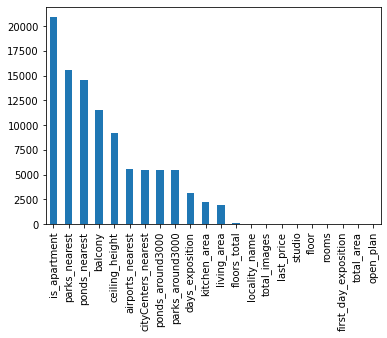

In [3]:
data_empty = data.isna().sum().sort_values(ascending=False)
print(data_empty)

data_empty.plot(kind='bar')

Видим огромное количество пропусков в данных. Разеберем.  
<span style="color:green">is_apartment</span> - самое большое количество пропусков (более 20 тыс.), скорее всего наличие пропусков связано с тем, что люди не знают отличие апартаментов от квартиры, либо не посчитали данный пункт важным для заполнения. Имеет смысл заменить пропуски на "False", так как скорее всего владельцы апартаментов, знают какой у них тип жилья.  
<span style="color:green">parks_nearest, ponds_nearest</span> - скорее всего пользователь посчитал эти данные неважными, либо не заполнял данную графу за неимением в ближайшем расположении парков,прудов. Так как некоторые пользователи указали "0" в данной графе, значит можно предположить, что пропуски можно заменить на "0".   
<span style="color:green">ponds_around3000, parks_around3000 </span> - эти данные тоже заполняются автоматически, в названии колонок указана цифра "3000", скорее всего это растояние в метрах, возможно пропуски связаны с тем, что ближайший парк за пределами данного расстояния.  
<span style="color:green">balcony </span> - так как в данных присутсвует значение количество балконов "0", скорее всего пропуски можно заполнить данным значением.  
<span style="color:green">cityCenters_nearest, airports_nearest </span> - пропуски скорее всего связаны с прилежащими к Санкт-Петербургу населенными пунктами. Карты искали центр города и аэропорт именно в данном населенном пункте и не нашли данных.   
<span style="color:green">ceiling_height </span> - высота потолков заполняется пользователем. Следует внимательно посмотреть на данные, так как максимальная высота потолков, как мы видели, равна 100, скорее всего это ошибка в заполнении.  
<span style="color:green">days_exposition </span> - важный показатель, который отсуствует в ряде данных, предполагаю,что данные представленные в датафрейме включают в себя только завершенные сделки продажия.Возможно теническая ошибка. Думаю, не следует менять эти данные.
<span style="color:green">kitchen_area, living_area</span> - заполним пропуски медианным значением по общей площади.   
<span style="color:green">floors_total </span> - заполним пропуски медианным значением. Предварительно проверим не превышает ли этаж квартиры общую этажность.
<span style="color:green">locality_name </span> - странно, что некоторые пользователи не указали населенный пункт, но думаю, что можно восполнить пропущенные значения по данным расстояния до центра. Судя по современным картам, если расстояние до центра менее 15 км, то скорее всего квартира в Санкт-Петербурге. 

Заполним пропущенные значения.

In [4]:
#заменим пропуски is_apartment на False
data['is_apartment'] = data['is_apartment'].fillna(False)

#заменим пропуски balcony, parks_nearest, ponds_nearest на 0
data['balcony'] = data['balcony'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

In [5]:
# заменим пропуски ceiling_height на медианное значение
data['ceiling_height'] = np.where(data['ceiling_height'] <= 0, data['ceiling_height'].median(), data['ceiling_height'])
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

# заменим пропуски floors_total на медианное значение
# Перед этим проверим не превышает ли floor floors_total
def floors_total(row):
    floor = row['floor']
    floors_total = row['floors_total']

    if floor > floors_total:
        return floors_total == floor
    elif floor < floors_total:
        return floors_total

data['floors_total'] = data.apply(floors_total, axis=1)
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
# заполним пропуски в kitchen_area и living_area медианным значением по общей площади
for area in data['total_area'].unique():
    data.loc[(data['total_area'] == area) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['total_area'] == area), 'kitchen_area'].mean()  
for area in data['total_area'].unique():
    data.loc[(data['total_area'] == area) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['total_area'] == area), 'living_area'].mean()  

# заполним пропуски в locality_name по расстоянию до центра
data.loc[(data['locality_name'].isnull()) & (data['cityCenters_nearest'] < 15000), 'locality_name'] = \
data.loc[(data['locality_name'].isnull()) & (data['cityCenters_nearest'] < 15000), 'locality_name'].fillna('Санкт-Петербург')

Проверим еще раз пропуски:

<AxesSubplot:>

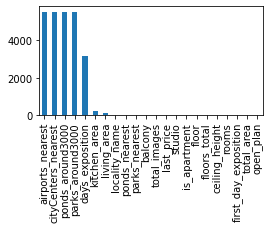

In [6]:
data_empty = data.isna().sum().sort_values(ascending=False)

data_empty.plot(kind='bar', figsize=(4,2))

Как видно на графике, пропусков стало значительно меньше.

#### Работа с типами данных в каждом столбце

Посмотрим какие типы данных в столбцах.

In [7]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23556 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23494 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23678 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,False,...,25.00,0.00,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,2.65,11.00,18.60,1,False,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,0.00,0.00,0.00,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,2.65,5.00,34.30,4,False,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,2.65,14.00,80.20,9,False,...,16.10,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,False,...,41.00,0.00,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


Для дальнейшего исследования понадобятся данные определенных типов для удобства создания новых столбцов.
Столбец <span style="color:green">is_apartment</span> уже изменил тип данных на bool при рабте с пропусками, так как все пропуски аменили на "False". Столбцы <span style="color:green"> floors_total, parks_nearest, ponds_nearest, balcony, days_exposition, last_price </span> приравняем к целочисленному типу данных.

In [8]:
list_to_int=['floors_total','parks_nearest','ponds_nearest','balcony','last_price']
for column in list_to_int:
    data[column] = data[column].astype('int')

Так же столбцу <span style="color:green">first_day_exposition</span> нужно присвоить тип данных datetime.

In [9]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Изучим уникальные значения в столбце <span style="color:green">locality_name</span> и устраним неявные дубликаты

In [10]:
name_count = data['locality_name'].nunique()
print(f'Количество уникальных значений: {name_count}')
data['locality_name'].unique()

Количество уникальных значений: 364


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [11]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['посёлок'], 'поселок', regex=True)
)

name_count = data['locality_name'].nunique()
print(f'Количество уникальных значений: {name_count}')

Количество уникальных значений: 330


# Шаг 3

### Добавьте в таблицу новые столбцы

Добавим в таблицу новые столбцы, необходимые для дальнейшего исследования.

In [12]:
# цена одного квадратного метра
data['square_meter'] = data['last_price'] / data['total_area']
# день недели, месяц, год публикации объявления
data['weekday_exposotoin'] = data['first_day_exposition'].dt.weekday
data['month_exposotoin'] = data['first_day_exposition'].dt.month
data['year_exposotoin'] = data['first_day_exposition'].dt.year
# тип этажа квартиры (первый/последний/другой)
def living_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']

    if floor == 1:
        return 'Первый'
    elif floor ==  floors_total:
        return 'Последний'
    else:
        return 'Другой'

data['living_floor'] = data.apply(living_floor, axis=1)
# расстояние до центра города в километрах
data['center_km'] = data['cityCenters_nearest']/ 1000 
data['center_km'] = data['center_km'].round()
data.head(10)
# цена за квадратный метр square_meter
data['square_meter'] = data['last_price'] / data['total_area'].astype(int)

# Шаг 4

### Проведите исследовательский анализ данных

#### Изучим описание параметров и откорректируем аномальные значения.

Изучаемые параметры: общая площадь, жилая площадь, цена объекта, количество комнат, высота потолков, этаж квартиры, общее количество этажей в доме, расстояние до центра города и до ближайшего парка.¶

In [13]:
print(data[['total_area','living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 'floors_total', 'cityCenters_nearest', 'parks_nearest']].describe())

       total_area  living_area  kitchen_area     last_price     rooms  \
count   23,699.00    23,556.00     23,494.00      23,699.00 23,699.00   
mean        60.35        34.45         10.52   6,541,548.77      2.07   
std         35.65        21.82          5.79  10,887,013.27      1.08   
min         12.00         2.00          1.30      12,190.00      0.00   
25%         40.00        18.70          7.10   3,400,000.00      1.00   
50%         52.00        30.00          9.16   4,650,000.00      2.00   
75%         69.90        42.20         11.90   6,800,000.00      3.00   
max        900.00       409.70        112.00 763,000,000.00     19.00   

       ceiling_height     floor  floors_total  cityCenters_nearest  \
count       23,699.00 23,699.00     23,699.00            18,180.00   
mean             2.72      5.89         10.93            14,191.28   
std              0.99      4.89          6.21             8,608.39   
min              1.00      1.00          2.00               18

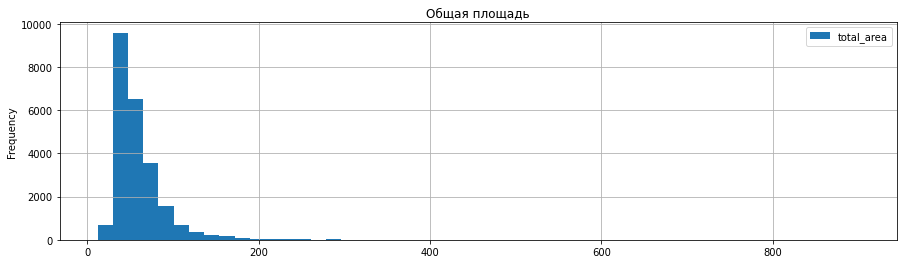

<AxesSubplot:title={'center':'Общая площадь'}, ylabel='Frequency'>

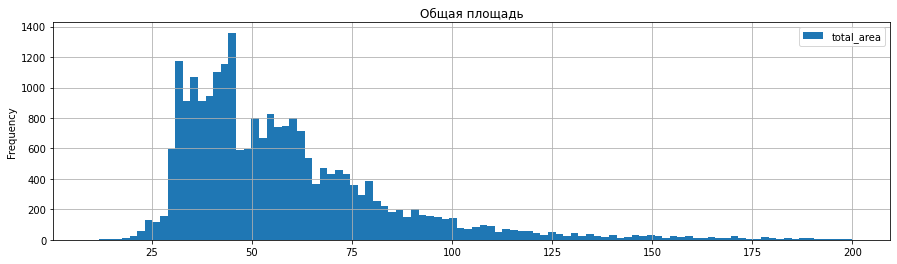

In [14]:
data.plot(kind='hist', title='Общая площадь', y='total_area', bins=50, grid=True, figsize=(15,4))
plt.show()
#Посмотрим поближе
data.plot(kind='hist', title='Общая площадь', y='total_area', bins=100, grid=True, figsize=(15,4), range=(10,200))

Как видно по гистограмме, распределение имеет несколько пиков в пределе значений от 30 до 80 кв.м., так же есть перекос вправо элитного жилья свыше 100 м.кв..  
Данные вполне реалистичны, большинство квартир до 100 кв.м.. По диаграмме размаха выбросами считаются квартиры площадью более 100 кв.м. По момему мнению нельзя исключать эти данные, ведь есть элитные тип жилья с большими площадями. Даже 900 кв.м.. А значения в 15 кв.м. тоже реалистичны, это могут быть комнаты в общежитиях или студии.  

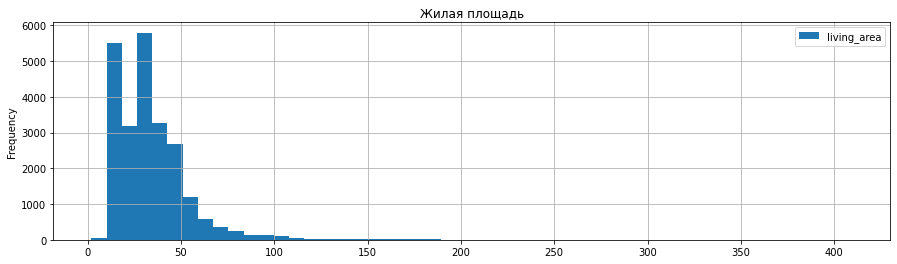

<AxesSubplot:title={'center':'Жилая площадь'}, ylabel='Frequency'>

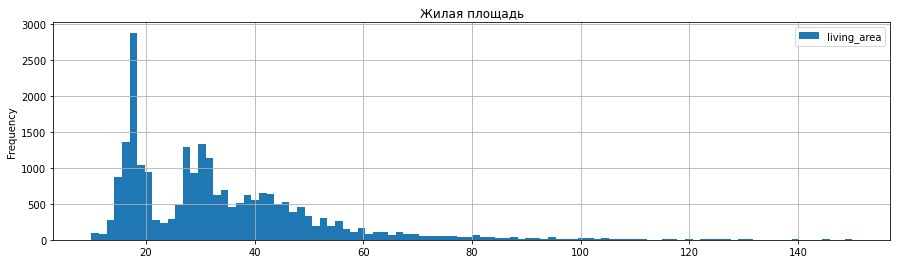

In [15]:
data.plot(kind='hist', title='Жилая площадь', y='living_area', bins=50, grid=True, figsize=(15,4))
plt.show()
data.plot(kind='hist', title='Жилая площадь', y='living_area', bins=100, grid=True, figsize=(15,4), range=(10,150))

Распределение имеет крупный пик на значении 15 кв.м. и еще два более мелких пика на 30 и 40 кв.м. Такой же перекос вправо, что соотносится с общей площадью.
Как в случае с общей площадью, не считаю выбросами высокие значения.

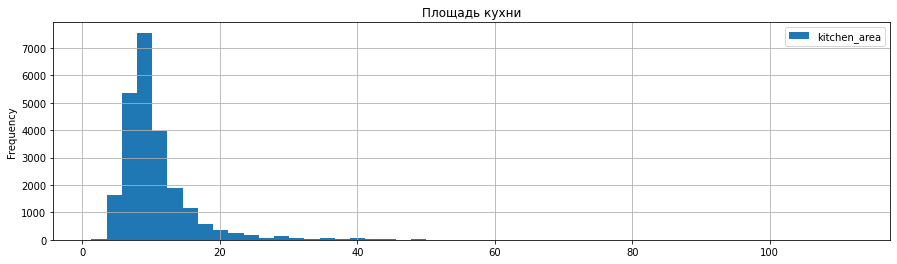

<AxesSubplot:title={'center':'Площадь кухни'}, ylabel='Frequency'>

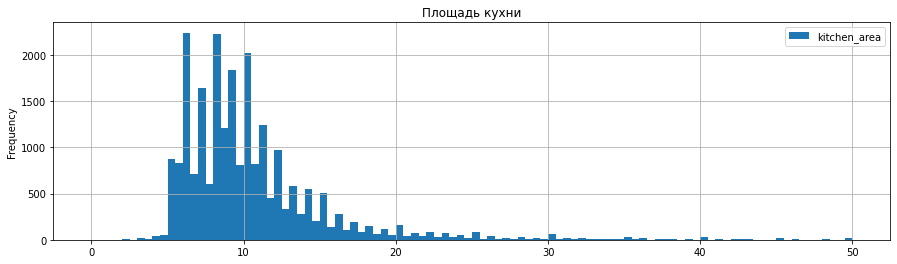

In [16]:
data.plot(kind='hist', title='Площадь кухни', y='kitchen_area', bins=50, grid=True, figsize=(15,4))
plt.show()
data.plot(kind='hist', title='Площадь кухни', y='kitchen_area', bins=100, grid=True, figsize=(15,4), range=(0,50))

Напоминает распределение Пуассона, Пик на значениях от 6 до 11 м.кв.  
Как в случае с общей площадью, не считаю выбросами высокие значения.

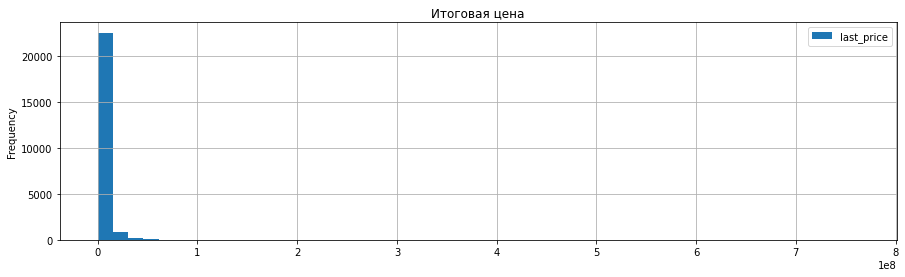

<AxesSubplot:title={'center':'Итоговая цена'}, ylabel='Frequency'>

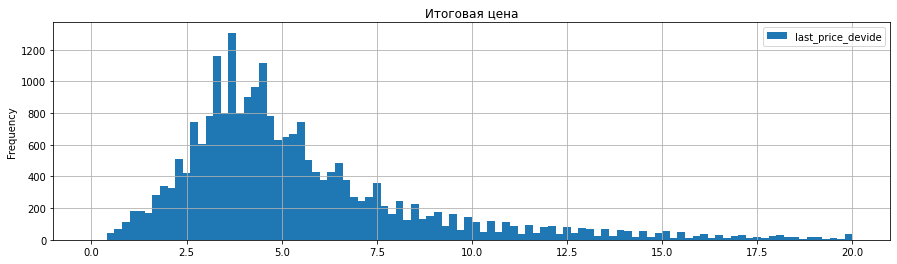

In [17]:
# Вводим новый столбец last_price_devide для большей наглядности графика
data['last_price_devide'] = data['last_price']/1000000
data.plot(kind='hist', title='Итоговая цена', y='last_price', bins=50, grid=True, figsize=(15,4))
plt.show()
data.plot(kind='hist', title='Итоговая цена', y='last_price_devide', bins=100, grid=True, figsize=(15,4), range=(0,20))

Короткий перекос влево, пик цен от 2,5 млн до 4,8 млн, и длинный перекос вправо, как и на верхних гистограммах. 

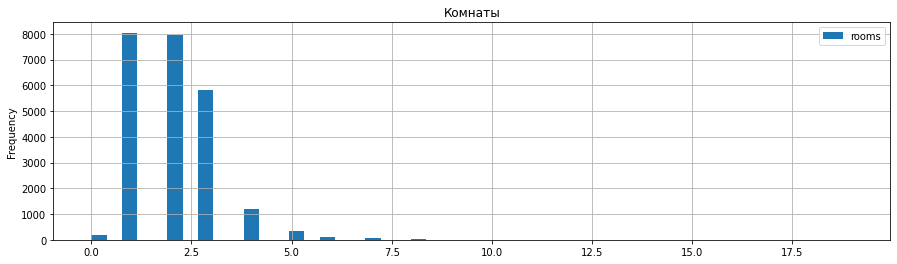

In [18]:
data.plot(kind='hist', title='Комнаты', y='rooms', bins=50, grid=True, figsize=(15,4))
plt.show()

Распредление Пуассона. Имеются квартиры со значением комнат 0, предполагаю, что это студии. Таких значений мало, стоит их оставить.

Как мы видели, в столбце ceiling_height имеются нереальные значения, такие как 100, 27, 22. Предлагаю удалить значения, которые меньше 2.5 метра и более 6 метров и заменить все пропуски на медианное.

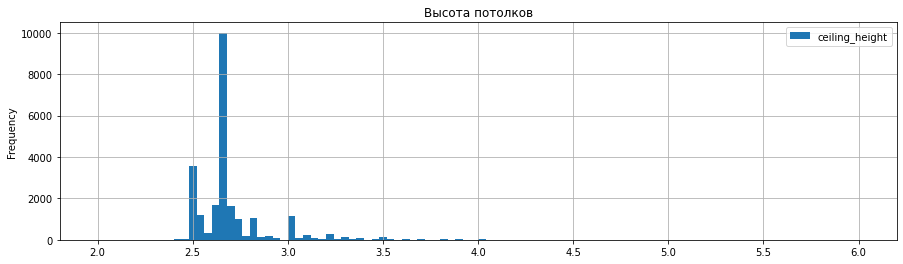

In [19]:
# Корректируем аномальные значения
data['ceiling_height'] = np.where(data['ceiling_height'] >= 6, data['ceiling_height'], data['ceiling_height'])
data['ceiling_height'] = np.where(data['ceiling_height'] <= 2.5, data['ceiling_height'], data['ceiling_height'])
# некорректные значения высоты потолков откорректировали ранее
data.plot(kind='hist', title='Высота потолков', y='ceiling_height', bins=100, grid=True, figsize=(15,4), range=(2,6))
plt.show()

Как мы видим, имеется один пик на значении 2,7 м. Нестандарных потолков выше 3,5 м крайне мало.

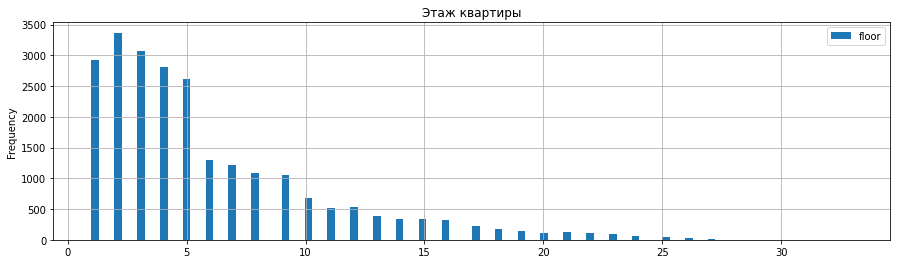

Другой       20383
Первый        2917
Последний      399
Name: living_floor, dtype: int64

In [20]:
data.plot(kind='hist', title='Этаж квартиры', y='floor', bins=100, grid=True, figsize=(15,4))
plt.show()
data['living_floor'].value_counts()

Распределение перекошено вправо, как видно на гистограмме, пиковые значения от 2 до 5 этажа. Это согласуется с тем, что большинство квартир располагается на "других" этажах.

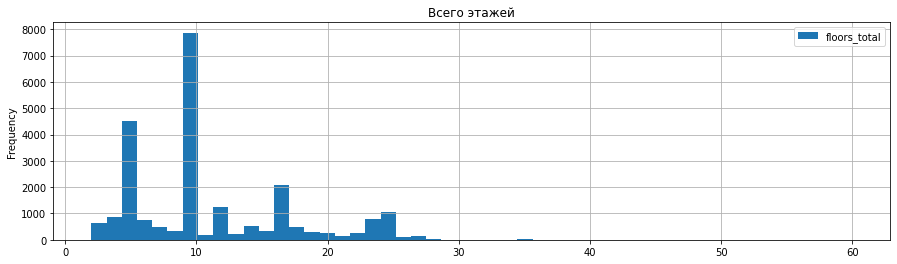

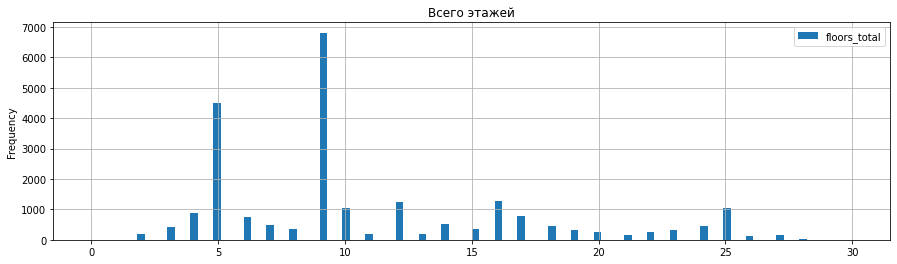

In [21]:
data.plot(kind='hist', title='Всего этажей', y='floors_total', bins=50, grid=True, figsize=(15,4))
plt.show()
data.plot(kind='hist', title='Всего этажей', y='floors_total', bins=100, grid=True, figsize=(15,4), range=(0,30))
# меняю значения выше 50 на медианное
data['floors_total'] = np.where(data['floors_total'] >= 50, data['floors_total'].median() , data['floors_total'])

Большинство домов 5, 9, 16, 25 -этажные.
Было принято решение поменять значения выше 50-этажей на медианные. 50-этажные дома даже в Санкт-Петербурге не норма, вряд ли квартира продается в Лахта Центре.

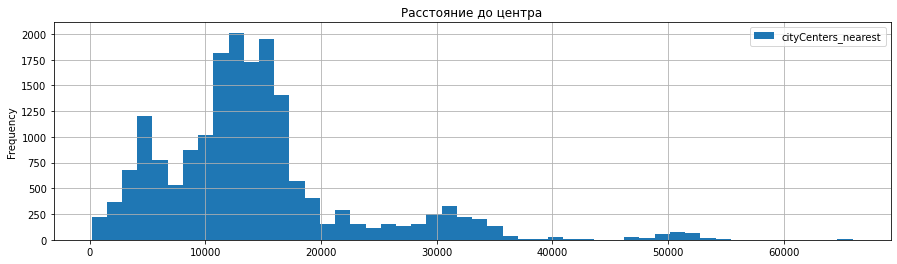

<AxesSubplot:title={'center':'Расстояние до центра'}, ylabel='Frequency'>

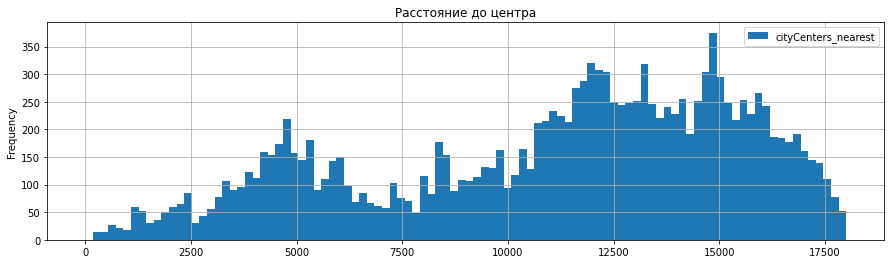

In [22]:
data.plot(kind='hist', title='Расстояние до центра', y='cityCenters_nearest', bins=50, grid=True, figsize=(15,4))
plt.show()
data.plot(kind='hist', title='Расстояние до центра', y='cityCenters_nearest', bins=100, grid=True, figsize=(15,4), range=(0,18000))

Преимущественно все квартиры располагаются в Санкт-Петербурге (до 18000м). Наибольшее количество распределено в промежутках от 14800 до 15000м, так же от 11000 до 125000м.
Резкий перекос вправо начинается от 18000 м, то есть за пределами города Санкт-Петербурга.

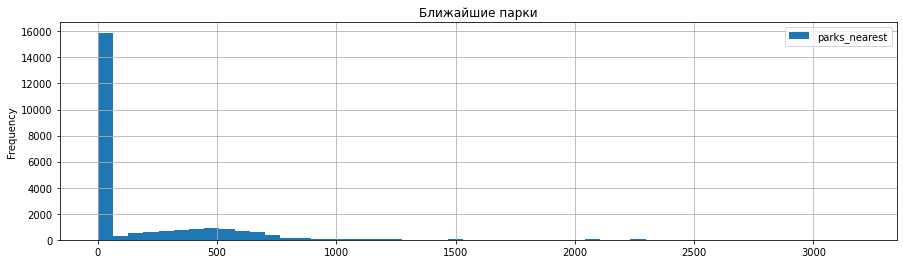

<AxesSubplot:title={'center':'Ближайшие парки'}, ylabel='Frequency'>

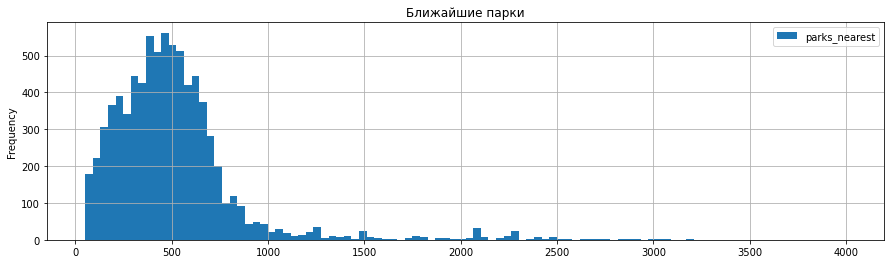

In [23]:
data.plot(kind='hist', title='Ближайшие парки', y='parks_nearest', bins=50, grid=True, figsize=(15,4))
plt.show()
data.plot(kind='hist', title='Ближайшие парки', y='parks_nearest', bins=100, grid=True, figsize=(15,4), range=(50,4000))

При заполнении пропусков пропущенные значения были заменены на "0". На гистограмме видно, что пик значений выпадает на "0". Если посмотреть на вторую гистограмму, то видно, что большинство парков располагается на расстоянии 300 - 600 м от квартир.

**Вывод:** по графикам можно сделать вывод, что продается большое количество элитного жилья с общей площадью более 100 кв.м. и ценой выше 6 млн.. Большинство квартир продаются в пределах 18000 м от центра города, но в основном на расстоянии от 10000 до 15000. В основном квартиры располагаются на "других" этажах в 5,9- этажных домах. Стоимость квартир чаще всего 3-4 млн и преобладают 1-2 комнатные. Если изучать известные данные по расстоянию до ближайшего парка, можно сдлеать вывод, что чаще всего парки располагаются на расстоянии от 400 до 600 м. Создадим новый датафрейм с наиболее стандартными значениями, чтобы не навредить дальнейшим расчетам.

In [24]:
new_data = data
columns_to_filter = ['last_price','total_area','rooms','ceiling_height','floors_total','living_area','days_exposition']
for column in columns_to_filter:
    q05 = data[column].quantile(0.005)
    q95 = data[column].quantile(0.995)
    data[column] = np.where((data[column] < q05) | (data[column] > q95), np.nan, data[column])
new_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter,weekday_exposotoin,month_exposotoin,year_exposotoin,center_km,last_price_devide
count,"23,699.00","23,465.00","23,463.00","23,609.00","23,511.00","23,647.00","23,320.00","23,699.00","23,494.00","23,699.00",...,"23,699.00","18,181.00","23,699.00","20,411.00","23,699.00","23,699.00","23,699.00","23,699.00","18,180.00","23,699.00"
mean,9.86,"6,049,604.66",59.12,2.05,2.69,10.88,33.75,5.89,10.52,0.59,...,167.32,0.77,199.11,175.21,"99,874.13",2.57,6.40,"2,017.37",14.18,6.54
std,5.68,"5,082,616.73",28.66,1.01,0.20,6.13,18.17,4.89,5.79,0.96,...,306.71,0.94,305.19,204.87,"50,418.42",1.79,3.49,1.04,8.62,10.89
min,0.00,"800,000.00",23.50,0.00,2.50,2.00,11.40,1.00,1.30,0.00,...,0.00,0.00,0.00,3.00,111.83,0.00,1.00,"2,014.00",0.00,0.01
25%,6.00,"3,450,000.00",40.00,1.00,2.60,5.00,18.80,2.00,7.10,0.00,...,0.00,0.00,0.00,45.00,"76,985.51",1.00,3.00,"2,017.00",9.00,3.40
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.16,0.00,...,0.00,1.00,0.00,95.00,"95,454.55",3.00,6.00,"2,017.00",13.00,4.65
75%,14.00,"6,750,000.00",69.30,3.00,2.70,15.00,42.00,8.00,11.90,1.00,...,301.00,1.00,389.00,228.00,"114,864.86",4.00,10.00,"2,018.00",16.00,6.80
max,50.00,"54,000,000.00",248.70,6.00,3.95,27.00,152.00,33.00,112.00,5.00,...,"3,190.00",3.00,"1,344.00","1,179.00","1,907,500.00",6.00,12.00,"2,019.00",66.00,763.00


#### Изучим, как быстро продавались квартиры 

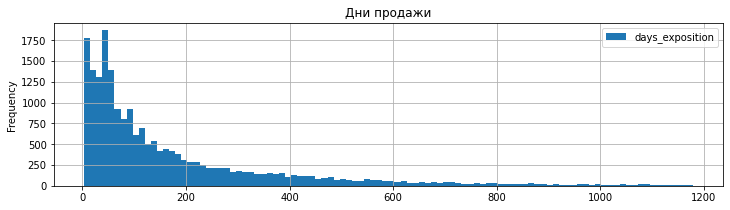

Среднее количество дней продажи: 175.20924991426193
Медианное количество дней продажи: 95.0
Стандартное отклонениe: 204.87089531666007


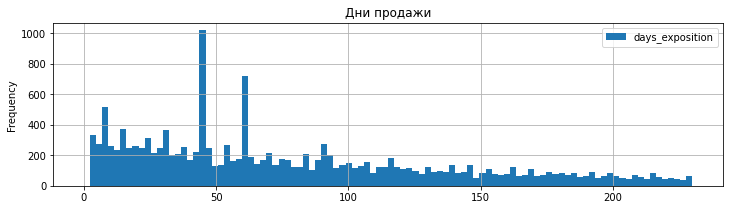

In [25]:
new_data.plot(title='Дни продажи',y='days_exposition', kind='hist', bins=100, grid=True, figsize=(12,3))
plt.show()
print('Среднее количество дней продажи:', data['days_exposition'].mean())
print('Медианное количество дней продажи:', data['days_exposition'].median())
print('Стандартное отклонениe:', data['days_exposition'].std())
new_data.plot(title='Дни продажи',y='days_exposition', kind='hist', bins=100, grid=True, figsize=(12,3), range=(0,230))
plt.show()

Медианного значение от среднего отличается почти в 2 раза, стандартное отклонение показывает насколько данные неоднородны. Это показывает, как и гистограмма, что имеются очень большой разброс в значениях. Есть квартиры которые продавались быстро, а есть те, что больше года. Рассмотрим гистограмму поближе.

Имеется пик на значений на 45 днях, следующий пик на 65 днях и маленький пик на 90.  
Можно разделить данные на группы:
1) Молниеносная продажа - до 45 дней;
2) Быстрая - от 45 до 95 дней;
3) Стандартные - от 90 до 230;
4) Необычно долгие - более 230 дней.

#### Определение факторов, которые больше всего влияют на общую стоимость объекта.

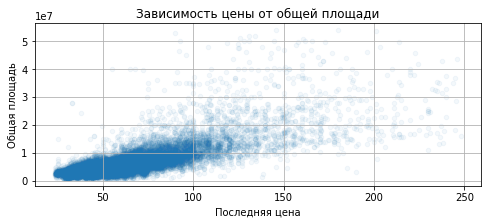

Коэффициент корреляции Пирсона: 0.77


In [26]:
# Проверим зависит ли цена от общей площади
new_data.plot(
    x='total_area',
    y='last_price', 
    kind='scatter',
    title='Зависимость цены от общей площади',
    alpha=0.05,
    grid=True,
    figsize=(8,3)
)
plt.xlabel('Последняя цена')
plt.ylabel('Общая площадь')
plt.show()
print('Коэффициент корреляции Пирсона:', round(data['total_area'].corr(data['last_price']),2))

Коэффициент Пирсона равен 0.77 - из этого следует, что цена действительно зависит от общей площади, но такая взаимосвязь иногда всегда прослеживается. Положительная корреляция наиболее ярко прослеживается у квартир площадью до 100 кв.м.

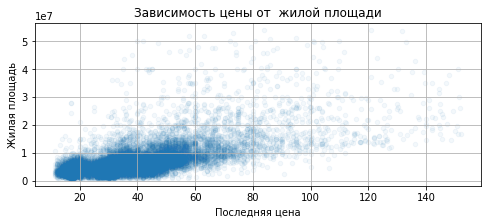

Коэффициент корреляции Пирсона: 0.67


In [27]:
# Проверим зависимость цены от жилой площади
new_data.plot(
    x='living_area',
    y='last_price', 
    kind='scatter',
    title='Зависимость цены от  жилой площади',
    alpha=0.05,
    grid=True,
    figsize=(8,3)
)
plt.xlabel('Последняя цена')
plt.ylabel('Жилая площадь')
plt.show()
print('Коэффициент корреляции Пирсона:', round(data['living_area'].corr(data['last_price']),2))

В данном случае коэффициент Пирсона 0.67, что говорит о том, что взаимосвязь между жилой площадью и ценой положительная, но такая взаимосвязь прослеживается не всегда.

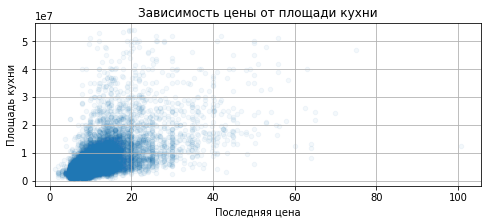

Коэффициент корреляции Пирсона: 0.6


In [28]:
# Проверим зависимость цены от площади кухни
new_data.plot(
    x='kitchen_area',
    y='last_price', 
    kind='scatter',
    title='Зависимость цены от площади кухни',
    alpha=0.05,
    grid=True,
    figsize=(8,3)
)
plt.xlabel('Последняя цена')
plt.ylabel('Площадь кухни')
plt.show()
print('Коэффициент корреляции Пирсона:', round(data['kitchen_area'].corr(data['last_price']),2))

В данном случае коэффициент Пирсона 0.6, что говорит о том, что взаимосвязь между площадью кухни и ценой положительная умеренная.

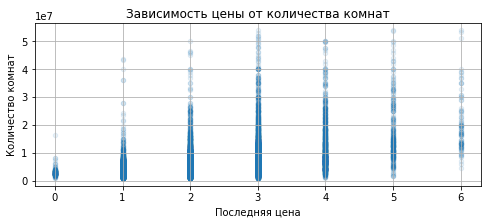

Коэффициент корреляции Пирсона: 0.48


In [29]:
# Проверим зависимость цены от количества комнат
new_data.plot(
    x='rooms',
    y='last_price', 
    kind='scatter',
    title='Зависимость цены от количества комнат',
    alpha=0.1,
    grid=True,
    figsize=(8,3)
)
plt.xlabel('Последняя цена')
plt.ylabel('Количество комнат')
plt.show()
print('Коэффициент корреляции Пирсона:', round(data['rooms'].corr(data['last_price']),2))

Слабая положительная корреляция между данными двумя параметрами.

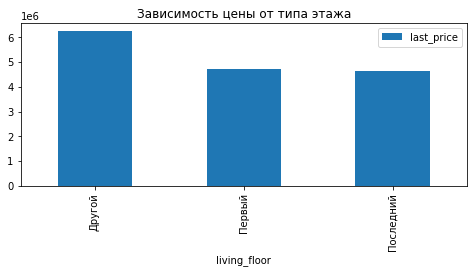

In [30]:
# Проверим зависимость цены от типа этажа
new_data.pivot_table(index='living_floor', values='last_price', aggfunc='mean').plot(
    style='-',
    kind='bar',
    title='Зависимость цены от типа этажа',
    figsize=(8,3)
)
plt.show()

Последний этаж имеет низкую стоимость в сравнении с другими, чуть большую стоимость имеет первый этаж. Квартиры располагающиеся на других этажах в среднем самые дорогие.

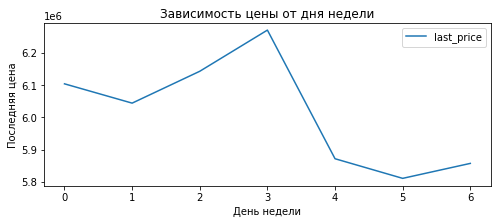

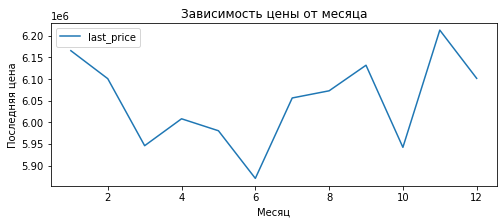

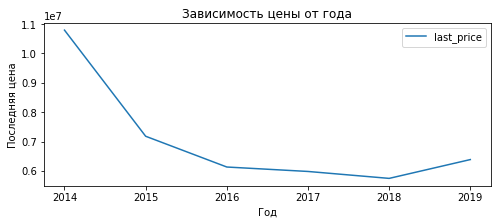

In [31]:
# Зависимость от даты размещения
# Используем сводные таблицы и среднее значение цены
new_data.pivot_table(index='weekday_exposotoin', values='last_price', aggfunc='mean').plot(
    style='-',
    title='Зависимость цены от дня недели',
    figsize=(8,3)
)
plt.xlabel('День недели')
plt.ylabel('Последняя цена')
plt.show()
new_data.pivot_table(index='month_exposotoin', values='last_price', aggfunc='mean').plot(
    style='-',
    title='Зависимость цены от месяца',
    figsize=(8,3)
)
plt.xlabel('Месяц')
plt.ylabel('Последняя цена')
plt.show()
new_data.pivot_table(index='year_exposotoin', values='last_price', aggfunc='mean').plot(
    style='-',
    title='Зависимость цены от года',
    figsize=(8,3)
)
plt.xlabel('Год')
plt.ylabel('Последняя цена')
plt.show()

В четверг чаще всего выкладывают объявления с высокой ценой. С четверга по субботу цена падает достигая своего минимума в субботу. С понедельника растет.  
В январе и ноябре выкладывают самые дорогие объявления. С января цены снижаются достигая минимума в июне. Затем плавно растут и в октябре вновь спад цен переходящий в пик в ноябре.  
С 2014 года цены значительно снизились. Думаю, что в 2014 году приложение было не так популярно, как в 2019, увеличением пользователей можно объяснить "спад цен", так как недорогого жилья с небольшой площадью наибольшее количество в исследуемых данных. Рост до пикового значения к 2019 году, предполагаю, что рост связан с интересом населения к вкладам в недвижимость из-за волатильности валюты.

#### Средняя квадратного метра в популярных населенных пунктах.

In [32]:
new_data.pivot_table(index='locality_name', values='last_price', aggfunc='count')\
.sort_values(by='last_price', ascending=False).head(10)

,last_price
locality_name,
Санкт-Петербург,15629
поселок Мурино,556
поселок Шушары,440
Всеволожск,398
Пушкин,369
Колпино,338
поселок Парголово,327
Гатчина,307
деревня Кудрово,299


Text(0, 0.5, 'Средняя цена')

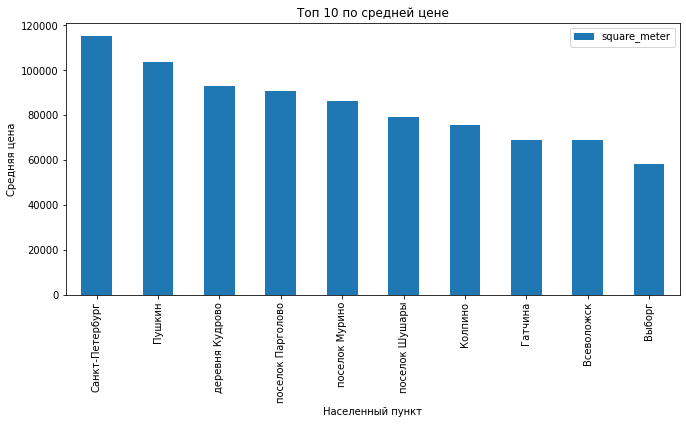

In [33]:
new_data.query('locality_name == "Санкт-Петербург" | locality_name == "поселок Мурино" | locality_name == "поселок Шушары" | locality_name == "Колпино" | locality_name == "Всеволожск" | locality_name == "поселок Парголово" | locality_name == "деревня Кудрово" | locality_name == "Пушкин" | locality_name == "Гатчина" | locality_name == "Выборг"')\
.pivot_table(index='locality_name', values='square_meter', aggfunc='mean')\
.sort_values(by='square_meter', ascending=False).round(0)\
.plot(kind='bar', figsize=(11,5), title='Топ 10 по средней цене')
plt.xlabel('Населенный пункт')
plt.ylabel('Средняя цена')

Чем больше объявлений о продаже, тем дороже цена за квадратный метр.  
Самая высокая цена за квадратный метр в Сантк-Петербурге и составляет 115,336 р. 
Самая низкая цена за квадратный метр в Выборге и составляет 58,296 р. 

#### Зависимость цены от удаленности центра Санкт-Петербурга

Отфильтрую данные по удаленности от центра на 15 км, так как если посмотреть на картографические данные, все населенные пункты более чем на 15 км удаленные от центра относятся уже к Ленинградской области.

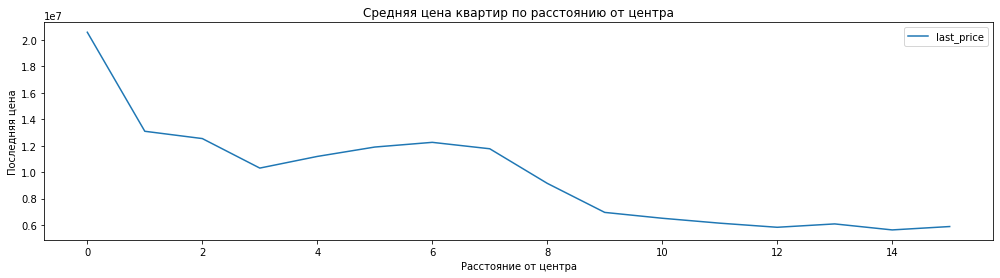

             last_price
center_km              
0.00      20,577,462.10
1.00      13,088,838.00
2.00      12,537,099.00
3.00      10,305,038.40
4.00      11,186,096.50
5.00      11,896,149.20
6.00      12,251,342.80
7.00      11,765,840.90
8.00       9,151,787.20
9.00       6,953,380.80
10.00      6,511,375.50
11.00      6,140,068.00
12.00      5,828,260.30
13.00      6,083,140.90
14.00      5,629,101.20
15.00      5,884,751.40


In [34]:
new_data[(new_data['locality_name']=='Санкт-Петербург')&(new_data['center_km'] <= 15)]\
.groupby('center_km').agg({'last_price':'mean'})\
.plot(figsize=(17,4), title='Средняя цена квартир по расстоянию от центра')
plt.xlabel('Расстояние от центра')
plt.ylabel('Последняя цена')
plt.show()
print(new_data[(new_data['locality_name']=='Санкт-Петербург')&(new_data['center_km'] <= 15)].groupby('center_km').agg({'last_price':'mean'}).round(1))

Средняя цена квартир снижается по мере удаленности от центра Санкт-Петербурга. Наибольшую среднюю стоимость (больше 10 млн.р.) имеют квартиры расположенные до 8 км от центра. Пиковое значение имееют квартиры в пределах до 1 км от центра - более 20 млн.р. Наименьшую стоимость (до 6 млн.р.) имеют квартиры расположенные в промежутке между 12 и 15 км от центра города.

# Шаг 5

**Общий вывод.**  
В ходе проведения исследования объявлений рынка недвижимости сервиса "Яндекс Недвижимость" за период с 2015 по 2019 год включительно, было выявлено, что на формирование цены вляют следующие факторы:  
1) Общая площадь. Особенно ярко выражена зависимость у квартир общей площадью до 100 кв.м. Чем больше площадь,тем выше цена.  
2) Жилая площадь. Этот параметр вытекает из прошлого (общей площади). Чем больше жилая площадь, тем выше цена.
3) Площадь кухни. Тоже вытекает из 1 пункта. Чем больше площадь кухни, тм выше цена.
3) Тип этажа. Квартиры, располагающиеся на последнем этаже стоят дешевле, чем на прочих. Квартиры располагающиеся на "других" этажах (не на первом и не на последнем) в среднем выше всех в цене.  
4) Населенный пункт. Самая высокая цена за квадратный метр в Сантк-Петербурге и составляет 115,336 р. Самая низкая цена за квадратный метр в Выборге и составляет 58,296 р.  
5) Расстояние до центра Санкт-Петербурга. Чем ближе жилье к центру, тем дороже. В самом центре города (менее 1 км) в среднем квартиры стоят более 20 млн.р., от 12 до 15 км от центра до 6 млн.р.

Так же в ходе исследования были определены характерные временные рамки продажи недвижимости:  
- Молниеносные продажа - до 45 дней;  
- Быстрые - от 45 до 95 дней; 
- Стандартные - от 90 до 230;  
- Необычно долгие - более 230 дней.

Проанализированны неявные закономерности связанные с днем/месяцем/годом когда было выложенно объявление:  
* В будние дни выкладывают объявления с более высокой ценой, в сравнении с выходными днями.
* В зимние месяцы продают самые дорогие квартиры, а в июне самые дешевые.
* С 2014 года средняя цена на недвижимость значительно уменьшились достигнув минимума к началу 2018 года. К 2019 году произошел небольшой рост.